In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'
Ruter_data = pd.read_csv(url, delimiter = ';')

# 1 - forekomster per busstype

In [3]:
Ruter_data['Kjøretøy_Kapasitet'].value_counts()

106    1805
112     791
151     690
115     492
105     475
80      452
72      398
130     205
71      193
69      174
75       89
33       68
77       45
76       45
47       39
70       34
103       4
102       1
Name: Kjøretøy_Kapasitet, dtype: int64

In [4]:
pd.unique(Ruter_data['Kjøretøy_Kapasitet'])

array([112, 151, 106,  71, 115,  72, 105,  33,  77,  80,  75,  70,  76,
        69, 130,  47, 103, 102])

In [5]:
len(pd.unique(Ruter_data['Kjøretøy_Kapasitet']))

18

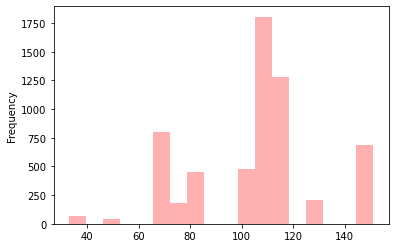

In [21]:
Ruter_data['Kjøretøy_Kapasitet'].plot.hist(color = '#FFB1B1', bins = 18)


# 2 - Gjennomsnittlig kapasitet i kommunene

In [33]:
kommune_kapasitet = Ruter_data.groupby(['Kommune']).mean()
kommune_kapasitet['Kjøretøy_Kapasitet']
kommune_kapasitet = kommune_kapasitet.reset_index()
kommune_kapasitet.sort_values(by="Kommune")
kommune_kapasitet.rename(columns={"Kjøretøy_Kapasitet": "Kapasitet"})

,Kommune,Linjeretning,Kapasitet,Passasjerer_Ombord
0,Alna,0.552381,128.428571,10.466667
1,Asker,0.450920,103.208589,5.306748
2,Aurskog-Høland,0.628866,104.597938,5.876289
3,Bjerke,0.517588,108.175879,7.507538
4,Bærum,0.477901,109.367403,2.211326
5,Drammen,0.666667,112.000000,7.000000
6,Eidsvoll,0.479167,99.944444,4.048611
7,Enebakk,0.450980,80.000000,2.209150
8,Frogner,0.575758,122.545455,6.333333
9,Gamle Oslo,0.515267,106.110687,6.797710


Text(0, 0.5, 'Kapasitet')

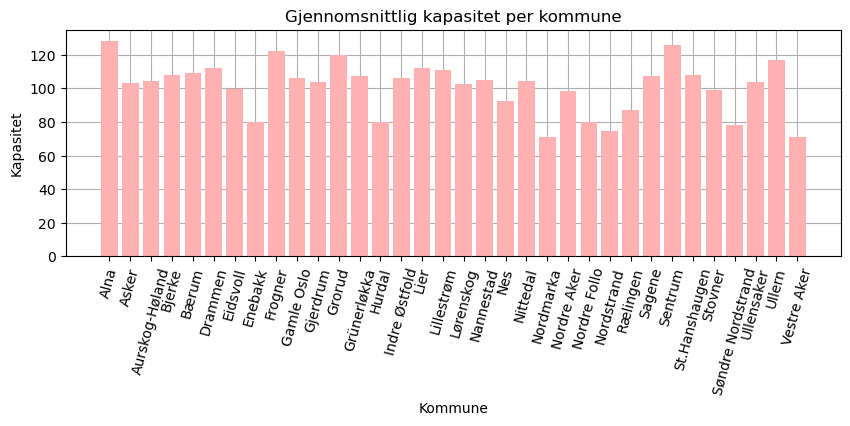

In [34]:
fig, ax = plt.subplots(figsize=(10,3), dpi=100)


x = kommune_kapasitet['Kommune']
y = kommune_kapasitet['Kjøretøy_Kapasitet']
plt.grid()
plt.bar(x, y, color='#FFB1B1')
plt.xticks(rotation=75)


ax.set_axisbelow(True)
ax.set_title('Gjennomsnittlig kapasitet per kommune') 
ax.set_xlabel('Kommune') 
ax.set_ylabel('Kapasitet')


# 3 - Avganger fordelt på kommuner

In [9]:
linje_kommune = Ruter_data[['Kommune', 'Linjenavn']]
linje_kommune = linje_kommune.drop_duplicates(subset=['Linjenavn'])

In [10]:
linje_kommune=linje_kommune.groupby("Kommune")
linje_kommune=linje_kommune.agg({"Linjenavn": "nunique"})
linje_kommune=linje_kommune.reset_index()
linje_kommune.sort_values(by="Kommune")
linje_kommune.rename(columns={"Linjenavn": "Antall linjer"})

,Kommune,Antall linjer
0,Alna,3
1,Asker,15
2,Aurskog-Høland,8
3,Bjerke,2
4,Bærum,13
5,Eidsvoll,9
6,Enebakk,3
7,Frogner,1
8,Gamle Oslo,3
9,Gjerdrum,4


Text(0, 0.5, 'Antall linjer')

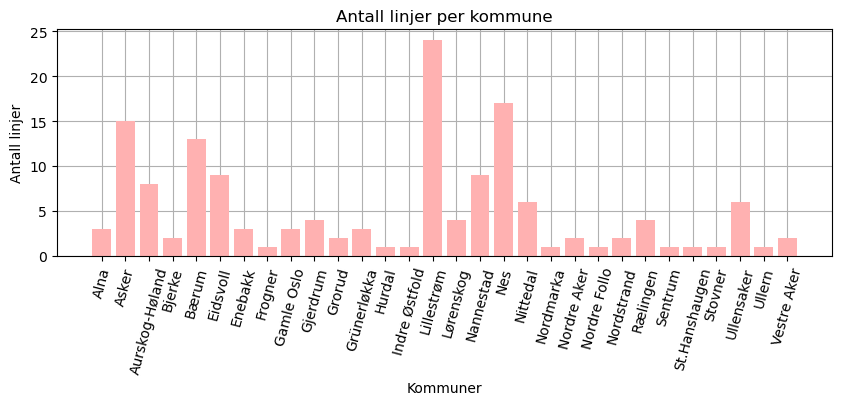

In [16]:
fig, ax = plt.subplots(figsize=(10,3), dpi=100)

x = linje_kommune['Kommune']
y = linje_kommune['Linjenavn'] 
plt.grid() 
plt.bar(x, y, color='#FFB1B1')
plt.xticks(rotation=75)

ax.set_axisbelow(True)
ax.set_title("Antall linjer per kommune") 
ax.set_xlabel('Kommuner') 
ax.set_ylabel('Antall linjer')

# 4 - Kapasitet per linje

Text(0, 0.5, 'Kjøretøy_Kapasitet')

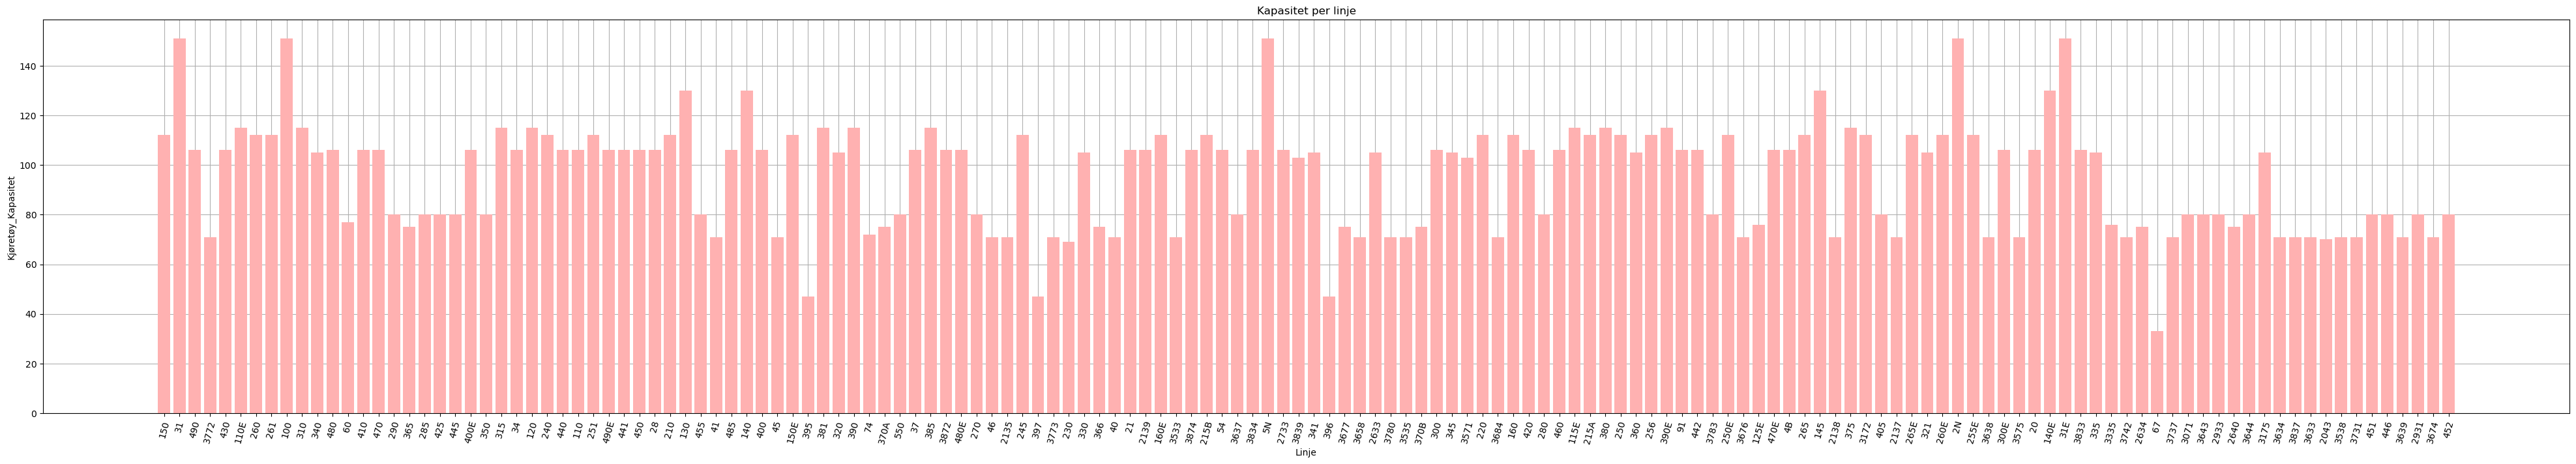

In [36]:
linje_kapasitet = Ruter_data[['Linjenavn', 'Kjøretøy_Kapasitet']]
linje_kapasitet.groupby('Linjenavn')['Kjøretøy_Kapasitet'].unique()

fig, ax = plt.subplots(figsize=(50,8), dpi=100)

x = linje_kapasitet['Linjenavn']
y = linje_kapasitet['Kjøretøy_Kapasitet']
plt.grid()
plt.bar(x, y, color='#FFB1B1')
plt.xticks(rotation=75)

ax.set_axisbelow(True)
ax.set_title('Kapasitet per linje') 
ax.set_xlabel('Linje') 
ax.set_ylabel('Kjøretøy_Kapasitet')

# 5 - Forekomst av ulike linjer

Lokal       5741
Ekspress     193
Skole         63
Natt           3
Name: Linjetype, dtype: int64

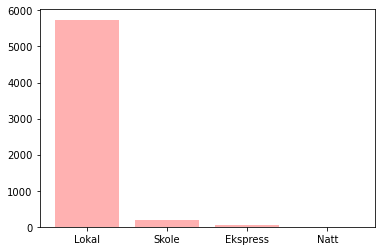

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(pd.unique(Ruter_data.Linjetype),Ruter_data.Linjetype.value_counts())
plt.bar(pd.unique(Ruter_data.Linjetype), Ruter_data.Linjetype.value_counts(), color='#FFB1B1')
Ruter_data.Linjetype.value_counts()

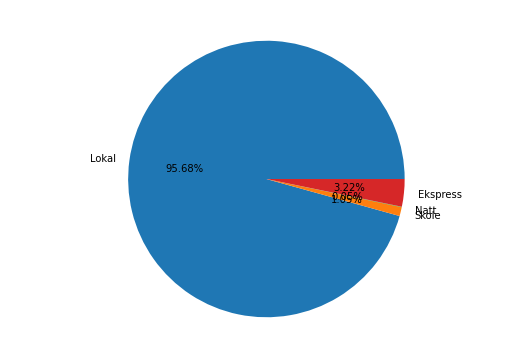

In [37]:
lokal = Ruter_data[(Ruter_data['Linjetype'] == 'Lokal')]
skole = Ruter_data[(Ruter_data['Linjetype'] == 'Skole')]
natt = Ruter_data[(Ruter_data['Linjetype'] == 'Natt')]
ekspress = Ruter_data[(Ruter_data['Linjetype'] == 'Ekspress')]

lokal_info = lokal.shape[0]
skole_info = skole.shape[0]
natt_info = natt.shape[0]
ekspress_info = ekspress.shape[0]

type = ['Lokal', 'Skole', 'Natt', 'Ekspress']
info = [lokal_info, skole_info, natt_info, ekspress_info]

ax = plt.figure().add_axes([0,0,1.2,1.2])
ax.axis('equal')
ax.pie(info, labels = type, autopct='%1.2f%%')
plt.show()